# Overfitting and Underfitting

## Bias vs Variance
### Bias
- Bias is when a model has a tendency to make errors due to simplifying the details of the data.
- With **High Bias** the model is too simplistic and can't capture the true patterns and nuances in the data..
- High Bias causes **Underfitting**

### Variance
- Variance is the model's sensitivity to the details and small nuances in the **training** dataset.
- With **High Variance** the model is overly complex  and fits the training data too tightly.
- High Variance causes **Overfitting**


### Example in Classification

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

### For Regression 
![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

## Addressing Overfitting and Underfitting
To address overfitting:
- Simplify the model by reducing its complexity and noise:
    - Using fewer features
    - Focusing on features that matter most
    - Reducing the value/intensity of hyperparmeters
- Applying Regularization
- Improving data quality (reduce noise)
- Increasing the amount of training data to get more diverse examples for the model to learn from
- Employing cross-validation 
- Using Ensemble Learning method

To address underfitting:
- Increase the complexity of the model by:
    - adding more insightful features (feature engineering and extraction)
    - Increasing the value/intensity of hyperparmeters
- Adding more relevant data point
- Reducing Regularization (if it was initially applied)
- Improving data quality
- Choosing a better ML algorithm

## **Exercise** Detecting and Preventing Overfitting and Underfitting

- Build an artificial dataset
- Use Decision Tree Classifier
- Monitor Underfitting and Overfitting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons # to generate data
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier #the algorithm we'll be using
from sklearn.metrics import accuracy_score

### Generate and Prepare The Data

In [ ]:
X, y = make_classification(n_samples=9000,   #row count
                           n_features=18,    #column count
                           n_informative=4,  #4 useful features - actually help predict the target
                           n_redundant=12,   #12 redundant of the informative features
                           random_state=2
                           )
#the remaining 2 features are noise

In [5]:
print(X[:4])

[[ 2.15631115 -1.69009525  0.85714501 -0.55237974 -1.29713357  2.41049057
   1.21394205  1.09574044 -0.27112028 -0.20828617 -0.74540214  0.15874997
  -0.12124403  0.41527157 -1.4665927   0.24655728 -2.68791625  0.21728147]
 [ 1.12057112 -0.06407922  1.04214442 -0.08316613 -1.09791873  0.90701872
  -1.22117341  1.15110676  0.4542019  -0.5555228  -0.42382371 -0.34233904
  -0.55241524  0.54362834 -1.12509168  0.46288361 -0.97242942  1.05363474]
 [ 0.74357671 -0.82491074 -1.79508674 -1.14081778  0.82869506  0.88458002
  -0.41430632 -1.26100077 -0.47885349  1.27796832 -1.24917637 -0.53498257
   0.07845352  0.66805215 -0.34665299 -1.54410869 -0.52434322 -1.72745768]
 [-1.43574439  1.57725257  0.28832671  0.91504136  0.30952157 -1.91487722
  -1.99874514  0.02931424  0.45691844 -0.46141609  0.72370715 -0.199109
  -0.06724064  0.42100685  0.74943438  0.28939435  1.80001553  0.80159623]]


In [6]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [7]:
#optional for demo purposes
pd.DataFrame(np.hstack((X,y.reshape(-1,1))))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.156311,-1.690095,0.857145,-0.552380,-1.297134,2.410491,1.213942,1.095740,-0.271120,-0.208286,-0.745402,0.158750,-0.121244,0.415272,-1.466593,0.246557,-2.687916,0.217281,1.0
1,1.120571,-0.064079,1.042144,-0.083166,-1.097919,0.907019,-1.221173,1.151107,0.454202,-0.555523,-0.423824,-0.342339,-0.552415,0.543628,-1.125092,0.462884,-0.972429,1.053635,0.0
2,0.743577,-0.824911,-1.795087,-1.140818,0.828695,0.884580,-0.414306,-1.261001,-0.478853,1.277968,-1.249176,-0.534983,0.078454,0.668052,-0.346653,-1.544109,-0.524343,-1.727458,1.0
3,-1.435744,1.577253,0.288327,0.915041,0.309522,-1.914877,-1.998745,0.029314,0.456918,-0.461416,0.723707,-0.199109,-0.067241,0.421007,0.749434,0.289394,1.800016,0.801596,0.0
4,-0.726817,0.238554,-0.486792,0.397939,0.580280,-0.861943,0.621715,-0.525683,-0.307491,0.200192,0.247341,0.055955,0.409927,-0.822130,0.624040,-0.407364,0.605788,-0.414297,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.830859,1.965363,-0.665370,-0.923464,-0.110722,-0.249474,1.244931,0.057567,1.497159,0.336089,-1.929889,-2.391172,-1.664827,0.535802,-1.652897,-1.149231,1.137957,0.788071,0.0
8996,0.480028,0.653986,0.835577,-0.966696,-0.749638,0.829746,0.204524,0.719419,1.301058,-0.452328,-0.107936,-0.236334,-1.297658,0.563042,-0.718714,1.249289,0.411169,1.128434,1.0
8997,1.802209,0.189373,-1.071166,-1.460649,-0.137728,1.274105,0.092904,-0.212706,0.635148,0.831388,-2.243735,-1.804862,-1.117498,1.931215,-1.859241,-1.484289,-0.583424,-0.325051,1.0
8998,0.809492,-0.189572,0.125969,-0.080578,-0.407116,0.522411,-1.027597,0.372593,0.014116,-0.012773,-0.613109,-0.443309,-0.160150,0.739815,-0.750670,-0.352771,-0.741542,0.185788,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Training The Model

- We'll be using the Decision Tree Classifier
- About:
    - Decision Tree algorithm is a very popular supervised learning algorithm. Can be used for both:
        - Classification: `DecisionTreeClassifier`
        - Regression: `DecisionTreeRegressor`
    - It creates a tree-like model where each internal node represents a feature or attribute
    - Each branch represents a decision rule
    - The algorithm evaluates each feature and threshold combination to find the ones that best separate the data into distinct classes

![dtc](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

Decision Trees can get very complex. The complexity level can be controlled by suing `max_depth`.

Objective for this demo:
1. Start the training for a low level of complexity. Then, increase it gradually using a hyperparameter (`max_depth`) It will help show the spectrum between undefitting and overfitting
2. Predict and store the results of both train and test (accuracy metric)
3. Plot the difference between the two

Automation Approach:
1. Pick a range between 1 and 20 for depth values
2. Define i value based on increasing depth
3. Fit/Train the mode for X_train
4. Predict the mode for X_train and X_test
5. Calculate the accuracy of both 
6. Append the values into lists
7. Plot the comparison between the two lists

In [16]:
train_scores = list()
test_scores = list()

#2. define a range of values
values = range(1,21)

for i in values:
    #define the model with the dynamic depth
    dtc = DecisionTreeClassifier(max_depth=i)

    # step 3
    dtc.fit(X_train, y_train)

    # step 4
    y_train_hat = dtc.predict(X_train)
    y_test_hat = dtc.predict(X_test)

    #step 5
    train_accu = accuracy_score(y_train, y_train_hat)
    test_accu = accuracy_score(y_test, y_test_hat)

    #step 6
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #log output
    print(f'max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')

max_depth=1 	| train score:0.668 	| test score:0.668
max_depth=2 	| train score:0.710 	| test score:0.693
max_depth=3 	| train score:0.796 	| test score:0.781
max_depth=4 	| train score:0.846 	| test score:0.838
max_depth=5 	| train score:0.869 	| test score:0.851
max_depth=6 	| train score:0.899 	| test score:0.873
max_depth=7 	| train score:0.917 	| test score:0.879
max_depth=8 	| train score:0.934 	| test score:0.882
max_depth=9 	| train score:0.946 	| test score:0.883
max_depth=10 	| train score:0.959 	| test score:0.877
max_depth=11 	| train score:0.967 	| test score:0.877
max_depth=12 	| train score:0.976 	| test score:0.875
max_depth=13 	| train score:0.982 	| test score:0.870
max_depth=14 	| train score:0.987 	| test score:0.870
max_depth=15 	| train score:0.990 	| test score:0.864
max_depth=16 	| train score:0.993 	| test score:0.866
max_depth=17 	| train score:0.995 	| test score:0.868
max_depth=18 	| train score:0.997 	| test score:0.870
max_depth=19 	| train score:0.998 	| 

In [11]:
plt.style.use('ggplot')

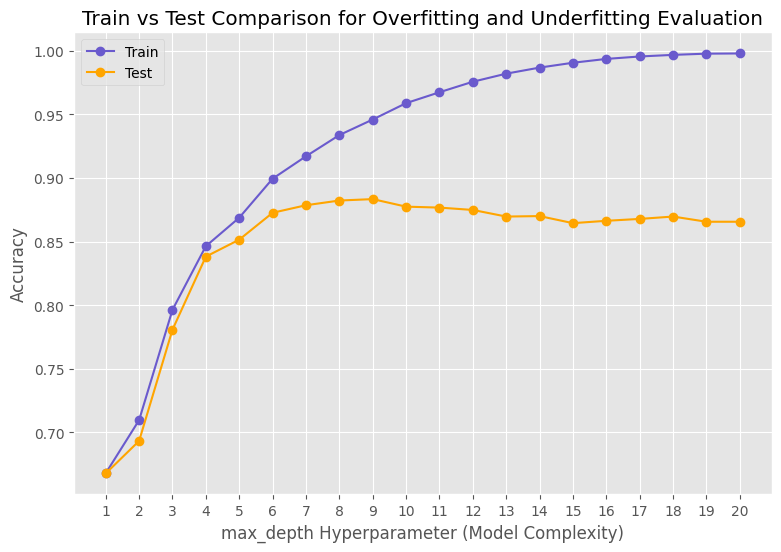

In [19]:
plt.figure(figsize=(9,6))
#train
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')
#test
plt.plot(values, test_scores, '-o', label='Test', color='orange')

plt.title('Train vs Test Comparison for Overfitting and Underfitting Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('max_depth Hyperparameter (Model Complexity)')
plt.xticks(values)
plt.legend()

- As we increase the `max_depth` the train accuracy goes up, the test accuracy goes up halfway and start plateauing then decline.
- Underfitting: 1 - 2
- Overfitting: 7 and above
- Optimal range: 4 - 7

Suppose we picked max depth of 5

In [20]:
dtc_model = DecisionTreeClassifier(max_depth=5)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
dtc_model.feature_importances_

array([0.0028858 , 0.        , 0.00033109, 0.04795045, 0.        ,
       0.00330353, 0.        , 0.06185532, 0.0952684 , 0.31770359,
       0.        , 0.        , 0.01070018, 0.        , 0.        ,
       0.24212804, 0.2178736 , 0.        ])

In [23]:
feature_importance = pd.DataFrame({'Feature':range(18), 'Importance':dtc_model.feature_importances_})
feature_importance

,Feature,Importance
0,0,0.002886
1,1,0.000000
2,2,0.000331
3,3,0.047950
4,4,0.000000
5,5,0.003304
6,6,0.000000
7,7,0.061855
8,8,0.095268
9,9,0.317704


In [26]:
from sklearn.tree import export_text, plot_tree

tree_view = export_text(dtc_model)
print(tree_view)

|--- feature_9 <= 0.67
|   |--- feature_16 <= -0.72
|   |   |--- feature_15 <= 0.67
|   |   |   |--- feature_9 <= -0.66
|   |   |   |   |--- feature_16 <= -1.73
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -1.73
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.66
|   |   |   |   |--- feature_16 <= -1.13
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -1.13
|   |   |   |   |   |--- class: 1
|   |   |--- feature_15 >  0.67
|   |   |   |--- feature_8 <= 0.12
|   |   |   |   |--- feature_16 <= -2.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -2.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.12
|   |   |   |   |--- feature_12 <= -0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_12 >  -0.83
|   |   |   |   |   |--- class: 0
|   |--- feature_16 >  -0.72
|   |   |--- feature_7 <= 0.65
|   |   |   |--- feature_15 <= -1.16
|   |   |   |   |--- feature_16 <= 0.04
|   |

[Text(0.5387931034482759, 0.9166666666666666, 'x[9] <= 0.671\ngini = 0.5\nsamples = 6300\nvalue = [3144, 3156]'),
 Text(0.27586206896551724, 0.75, 'x[16] <= -0.718\ngini = 0.477\nsamples = 4874\nvalue = [2963, 1911]'),
 Text(0.4073275862068966, 0.8333333333333333, 'True  '),
 Text(0.13793103448275862, 0.5833333333333334, 'x[15] <= 0.668\ngini = 0.494\nsamples = 2337\nvalue = [1037, 1300]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[9] <= -0.658\ngini = 0.314\nsamples = 1266\nvalue = [247, 1019]'),
 Text(0.034482758620689655, 0.25, 'x[16] <= -1.732\ngini = 0.428\nsamples = 145\nvalue = [100, 45]'),
 Text(0.017241379310344827, 0.08333333333333333, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.05172413793103448, 0.08333333333333333, 'gini = 0.34\nsamples = 115\nvalue = [90, 25]'),
 Text(0.10344827586206896, 0.25, 'x[16] <= -1.129\ngini = 0.228\nsamples = 1121\nvalue = [147, 974]'),
 Text(0.08620689655172414, 0.08333333333333333, 'gini = 0.14\nsamples = 820\nvalue = [62,

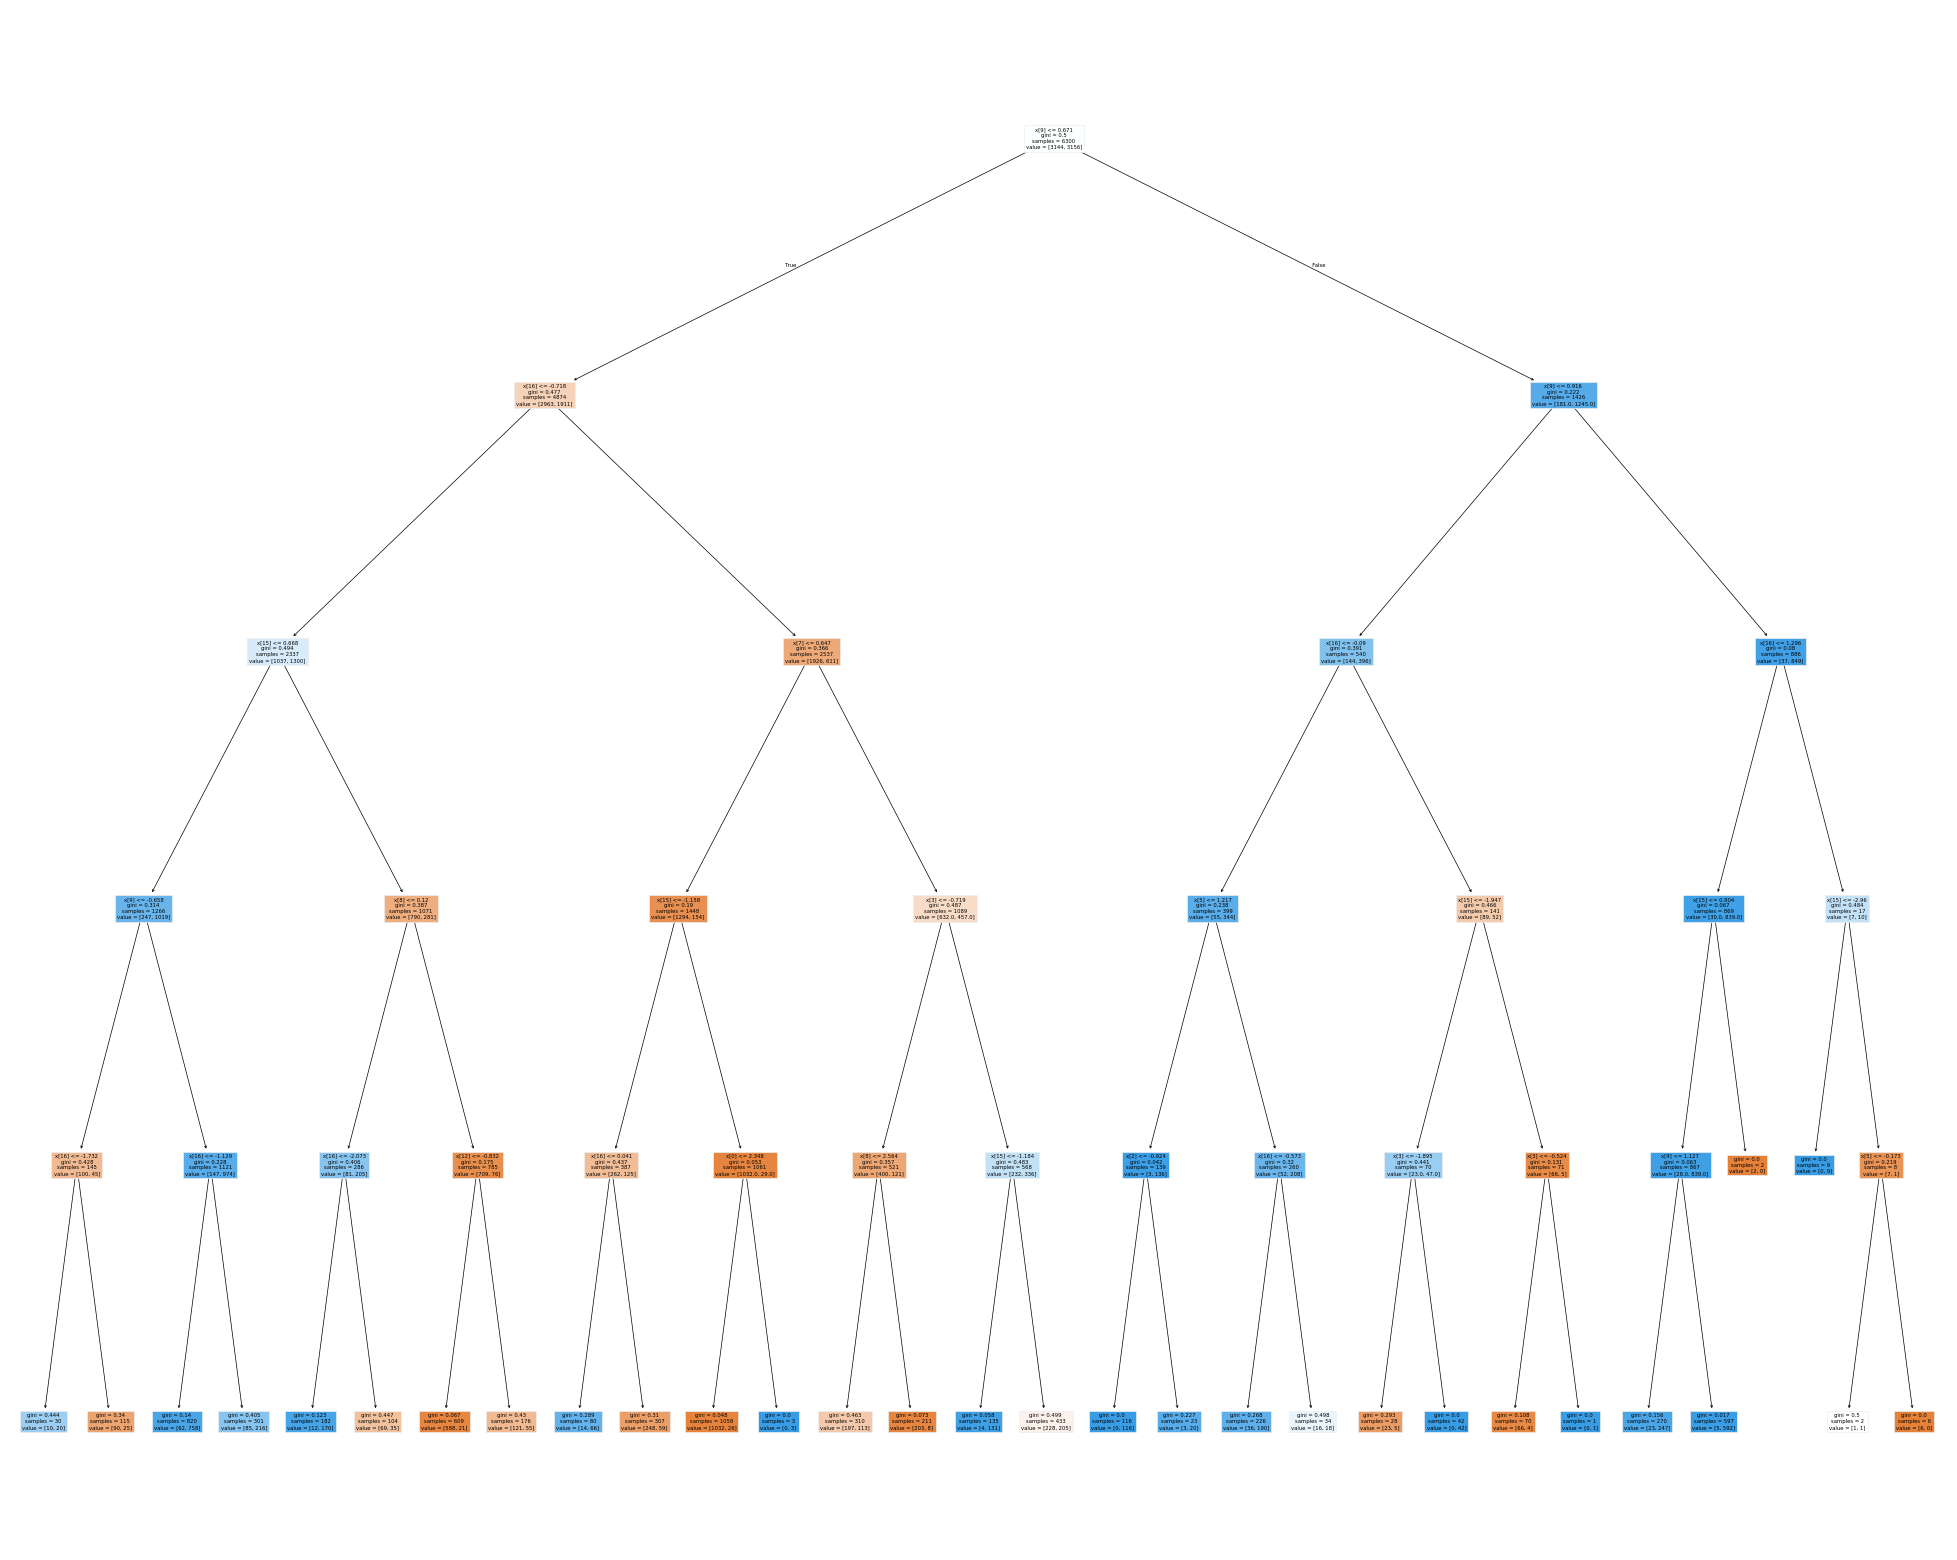

In [29]:
plt.figure(figsize=(25,20))
plot_tree(dtc_model, filled=True)